# **Ultimate Technologies Inc. Take Home Challenge - Hector Sanchez**

### **Part 1 - Exploratory Data Analysis**

In [3]:
# First, I'll start by importing the necessary libraries/packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Next, I'll load the logins.json file
# I'll convert the .json file to a .csv file to make it more accessible for future use

# Define the file paths

json_file_path = 'C:/Users/hecsa/Springboard/Springboard Github/Springboard/1631809090_1481053515_ultimate_challenge_3_/ultimate_challenge/logins.json'
csv_file_path = 'C:/Users/hecsa/Springboard/Springboard Github/Springboard/1631809090_1481053515_ultimate_challenge_3_/ultimate_challenge/logins.csv'

# Read the .json file into a pandas DataFrame

logins_json = pd.read_json(json_file_path)

# Now, convert the DataFrame to a .csv file

logins_json.to_csv(csv_file_path, index=False)

# Read the .csv file into a pandas DataFrame

logins_csv_file_path = 'C:/Users/hecsa/Springboard/Springboard Github/Springboard/1631809090_1481053515_ultimate_challenge_3_/ultimate_challenge/logins.csv'
logins_csv = pd.read_csv(logins_csv_file_path)

print(f"JSON file has been successfully converted to a CSV file at {csv_file_path}")

JSON file has been successfully converted to a CSV file at C:/Users/hecsa/Springboard/Springboard Github/Springboard/1631809090_1481053515_ultimate_challenge_3_/ultimate_challenge/logins.csv


Call .head() on the JSON and CSV file to ensure that the data and format match. I want to avoid any data inconsistencies before moving forward.

In [6]:
logins_json.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [7]:
logins_csv.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [8]:
logins_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   login_time  93142 non-null  object
dtypes: object(1)
memory usage: 727.8+ KB


Now, I'm going to convert the timestamps in 'logins_csv' to a datetime format. Once this is done, I'll resample the data into 15 minute time intervals. The last step will be to visualize the time series. 

In [10]:
# Start by converting the timestamps to datetime

logins_csv['login_time'] = pd.to_datetime(logins_csv['login_time'])

In [11]:
# Now, I'll set the datetime column as the index

logins_csv.set_index('login_time', inplace=True)

In [12]:
# Next, I'll resample the timestamps into 15 minute intervals and then count the logins
# '15T' sets the 15 minute time intervals
# The .size() method counts the number of user logins in each 15 minute interval

login_counts = logins_csv.resample('15T').size()

In [13]:
login_counts.head(60)

login_time
1970-01-01 20:00:00     2
1970-01-01 20:15:00     6
1970-01-01 20:30:00     9
1970-01-01 20:45:00     7
1970-01-01 21:00:00     1
1970-01-01 21:15:00     4
1970-01-01 21:30:00     0
1970-01-01 21:45:00     4
1970-01-01 22:00:00     9
1970-01-01 22:15:00     8
1970-01-01 22:30:00     1
1970-01-01 22:45:00     3
1970-01-01 23:00:00    16
1970-01-01 23:15:00    13
1970-01-01 23:30:00    14
1970-01-01 23:45:00    15
1970-01-02 00:00:00    10
1970-01-02 00:15:00    18
1970-01-02 00:30:00    12
1970-01-02 00:45:00    13
1970-01-02 01:00:00     9
1970-01-02 01:15:00     8
1970-01-02 01:30:00    10
1970-01-02 01:45:00     6
1970-01-02 02:00:00     7
1970-01-02 02:15:00    18
1970-01-02 02:30:00    12
1970-01-02 02:45:00     6
1970-01-02 03:00:00    12
1970-01-02 03:15:00     5
1970-01-02 03:30:00     6
1970-01-02 03:45:00     5
1970-01-02 04:00:00     2
1970-01-02 04:15:00     0
1970-01-02 04:30:00     5
1970-01-02 04:45:00     2
1970-01-02 05:00:00     5
1970-01-02 05:15:00     4
1

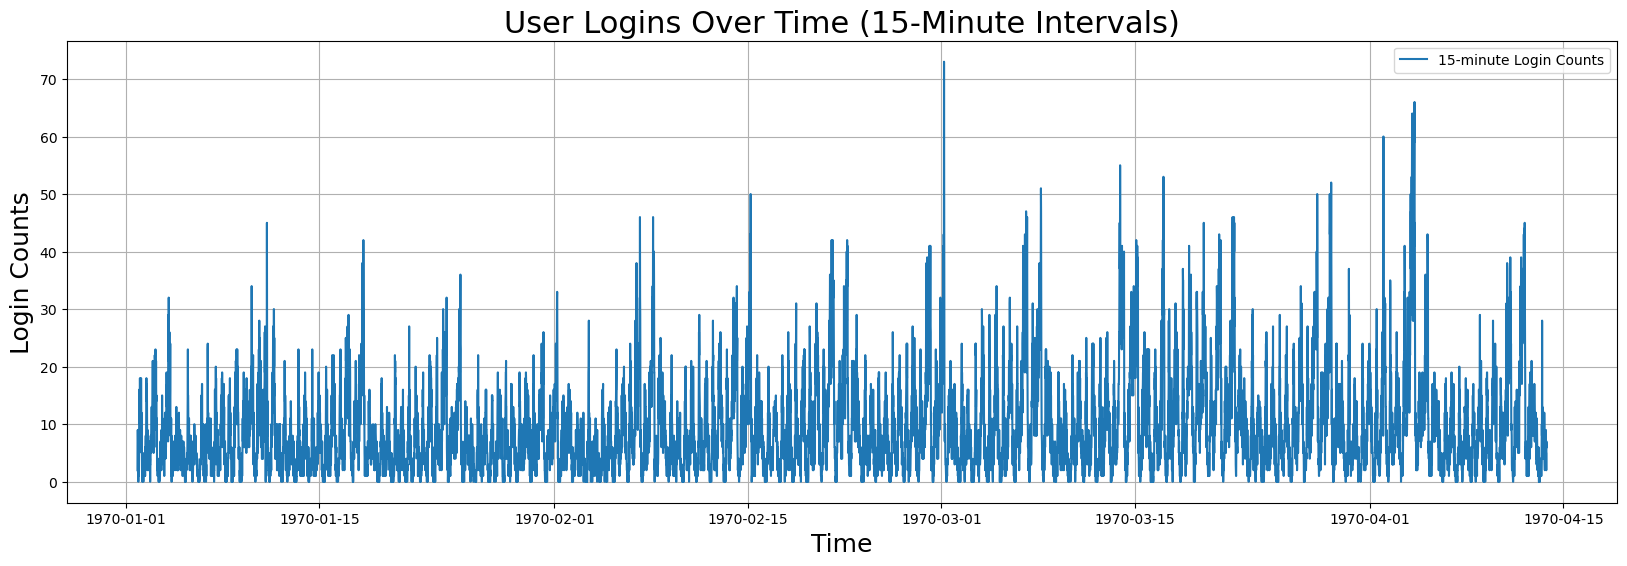

In [14]:
# The next step is to visualize the time series using the code below

plt.figure(figsize=(20, 6))
plt.plot(login_counts, label='15-minute Login Counts')
plt.title('User Logins Over Time (15-Minute Intervals)', fontsize=22)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Login Counts', fontsize=18)
plt.legend()
plt.grid()
plt.show()

Initial Findings and Next Steps:

-Based on our call of .head(60), it seems that more users tend to log in between the hours of 11pm and 3am. However, it's worth noting that this assumption is based on viewing the data from roughly a 24 hour window. 

-User logins spiked significantly on 1970-03-01 to over 70 logins in one specific 15 minute interval. 

-In order to help visualize any trends or cycles more clearly, I will filter the data to include less entries.

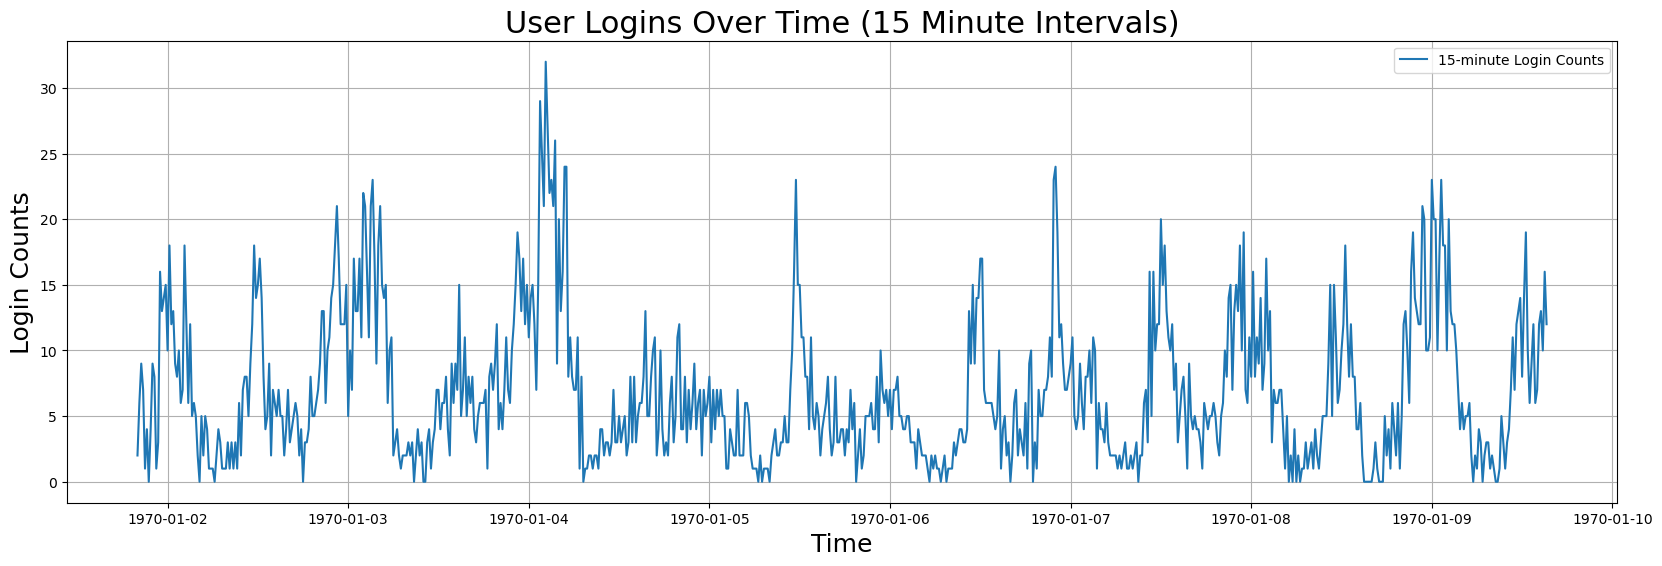

In [16]:
# I'll start by filtering the data to the first 1000 intervals

filtered_login_counts = login_counts[:750]

# Plot the filtered data

plt.figure(figsize=(20, 6))
plt.plot(filtered_login_counts, label='15-minute Login Counts')
plt.title('User Logins Over Time (15 Minute Intervals)', fontsize=22)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Login Counts', fontsize=18)
plt.legend()
plt.grid()
plt.show()

My filtered plot shows data over the course of about 10 days. It seems as though User Logins spike at least once per day, which aligns with the observation I made earlier, which was tht users login during later hours of the night. The increase in logins on some days is higher than others, which could likely be dur to these specific days falling on weekends. I'll need to continue with a deeper dive, but it seems as though this data supports the fact that Users utilize this transportatoin service to attend or engage in late night recretiaional activites. However, the opposite could be argued as well. The large spikes on some days versus others could be because these days are traditional workdays, therefore more users have a need for transportatoin on these days versus the weekends when they might not have work or school. I'll visualize some box plots below to display User logins by Hour of the Day, and also by Day of the Week.  

In [18]:
# Now I'm going to group the data by Hour of the Day or Day of the Week

filtered_login_counts = pd.DataFrame({
    'Timestamp': pd.date_range('1970-01-01 20:00:00', periods=750, freq='15min'),
    'Login Count': np.random.randint(0, 50, size=750)
})

# Convert 'Timestamp' to datetime if not already
filtered_login_counts['Timestamp'] = pd.to_datetime(filtered_login_counts['Timestamp'])

# Extract hour of the day and day of the week
filtered_login_counts['Hour'] = filtered_login_counts['Timestamp'].dt.hour
filtered_login_counts['Day of Week'] = filtered_login_counts['Timestamp'].dt.day_name()

<Figure size 1200x600 with 0 Axes>

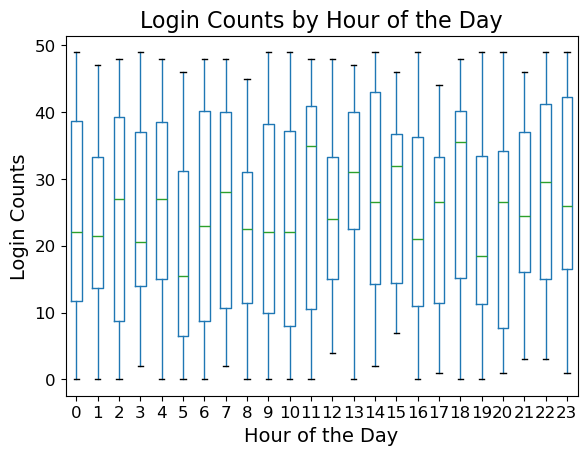

In [19]:
plt.figure(figsize=(12, 6))
filtered_login_counts.boxplot(column='Login Count', by='Hour', grid=False)
plt.title('Login Counts by Hour of the Day', fontsize=16)
plt.suptitle('')
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Login Counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<Figure size 1200x600 with 0 Axes>

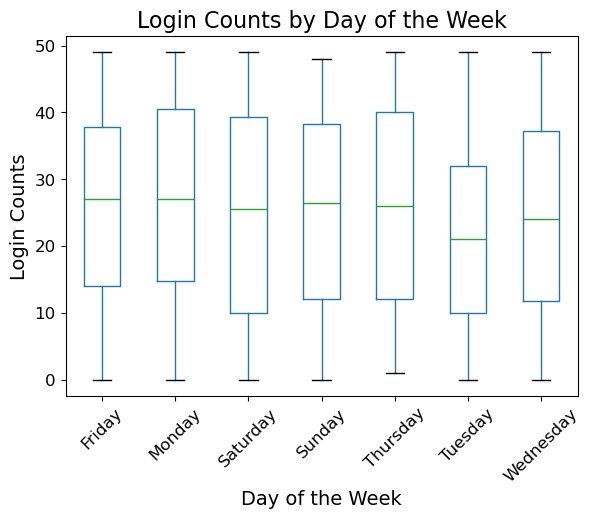

In [20]:
plt.figure(figsize=(12, 6))
filtered_login_counts.boxplot(column='Login Count', by='Day of Week', grid=False)
plt.title('Login Counts by Day of the Week', fontsize=16)
plt.suptitle('') 
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Login Counts', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

### **Part 2: Experiment and Metrics Design**

**Key Measure of Success**
The idea of reimbursing all toll costs to Ultimate drivers sparks a variety of questions regarding it's effectiveness. While I don't have data for Gothan and Metropolis, I'll explain which metrics would prove to be useful and why. 

A potential Key Measure of Success would be metric such as "% increase in cross-city trips." Depending on the length of the experiment, we could analyze this metrics week over wekk, month over month, or quarter over quarter basis to inspect the impact of full toll reimbursement on cross city trips.

**Experimental Design**

**Implementation**
The experiment itself could be implemented in the following manner:

-Create two groups and randomly assign Ultimate drivers to each of them. The Control Group would have no toll reimbursement. The Treatment/Test Group would have full toll reimbursement
-It's imperative that we collect data on driver cross city trips, average earnings, and toll usage, for a predefined, but significant time period. We would try 4-6 weeks worth of data collection.

**Statistical Testing**
We could then use statistical tests to help us verify the significance of the obervations. We can start with a Two Sample T-Test. T-tests help us assess whether the observed difference in means is statistically significant. Therefore, our focus would be to compare the mean number of cross city trips between the Control and Treatment/Test groups. Using a Two Sample T-Test assumes that the obervations in the control group are independent of the Treatment Group, that cross city trips are roughly normally disributed in both groups, and that the varaince of cross city trips is similar in both groups. This test is a good fit because our experiment has two independent groups. The test gives us a clear p-value as long as the assumptions are met. 

If the data on cross city trips is not normally distributed, we could consider using a Mann-Whitney U Test, or Welch's t-Test. Also, if the data happens to be categorical in nature, we could consider using a Chi-Square Test since it compares the proportions across groups instead of their numerical means.

We would also need to use Hypthesis Testing. Here are my suggested Null and Alterative Hypotheses:

-Null Hypotesis: Full Toll Reimbursement does not have an impact on cross city trips
-Alernative Hypothesis: Full Toll Reimbursement increases cross city trips

If the results are statistically significant (have the desired p-value), we can recommend the reimbursement program. 

### **Part 3: Predictive Modeling**

**Load and Explore the Data**

In [25]:
# Define the file paths

ultimate_json_file_path = 'C:/Users/hecsa/Springboard/Springboard Github/Springboard/1631809090_1481053515_ultimate_challenge_3_/ultimate_challenge/ultimate_data_challenge.json'
ultimate_csv_file_path = 'C:/Users/hecsa/Springboard/Springboard Github/Springboard/1631809090_1481053515_ultimate_challenge_3_/ultimate_challenge/ultimate_data_challenge.csv'

# Read the .json file into a pandas DataFrame

ultimate_data_challenge_json = pd.read_json(ultimate_json_file_path)

# Now, convert the DataFrame to a .csv file

ultimate_data_challenge_json.to_csv(ultimate_csv_file_path, index=False)

# Read the .csv file into a pandas DataFrame

ultimate_data_challenge_csv_file_path = 'C:/Users/hecsa/Springboard/Springboard Github/Springboard/1631809090_1481053515_ultimate_challenge_3_/ultimate_challenge/ultimate_data_challenge.csv'
ultimate_data_challenge_csv = pd.read_csv(ultimate_data_challenge_csv_file_path)

print(f"JSON file has been successfully converted to a CSV file at {ultimate_csv_file_path}")

JSON file has been successfully converted to a CSV file at C:/Users/hecsa/Springboard/Springboard Github/Springboard/1631809090_1481053515_ultimate_challenge_3_/ultimate_challenge/ultimate_data_challenge.csv


In [26]:
# Call .head() on the newly converated CSV file to view the first few rows

ultimate_data_challenge_csv.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [27]:
# Call .info() to view the types of each feature and the number of rows and columns

ultimate_data_challenge_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [28]:
# Call .describe() to view basic summary statistics of the features in the dataset

ultimate_data_challenge_csv.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [29]:
# Utilize .isnull().sum() to check for any missing values in the data

missing_values = ultimate_data_challenge_csv.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64


**Data Cleaning and Feature Engineering**

Based on my call of .isnull().sum(), there missing values in 'avg_rating_of_driver', 'avg_rating_by_driver', and 'phone'. I'll start by imputing missing values and then creating the requested features.

In [32]:
# Handle missing values by imputing the numeric columns/featuers with the median

ultimate_data_challenge_csv['avg_rating_by_driver'].fillna(ultimate_data_challenge_csv['avg_rating_by_driver'].median(), inplace=True)
ultimate_data_challenge_csv['avg_rating_of_driver'].fillna(ultimate_data_challenge_csv['avg_rating_of_driver'].median(), inplace=True)

In [33]:
# Next, I'll create the feature 'days_since_Last_trip'

ultimate_data_challenge_csv['last_trip_date'] = pd.to_datetime(ultimate_data_challenge_csv['last_trip_date'])
ultimate_data_challenge_csv['signup_date'] = pd.to_datetime(ultimate_data_challenge_csv['signup_date'])
ultimate_data_challenge_csv['days_since_last_trip'] = (ultimate_data_challenge_csv['last_trip_date'].max() - ultimate_data_challenge_csv['last_trip_date']).dt.days

In [34]:
# Now, I'll create the binary target, 'active_in_sixth_month'

ultimate_data_challenge_csv['active_in_sixth_month'] = np.where(ultimate_data_challenge_csv['days_since_last_trip'] <= 30, 1, 0)

In [35]:
# Utilize .head() to view the newly cleaned datasset

ultimate_data_challenge_csv.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_trip,active_in_sixth_month
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,14,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,57,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,175,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,108,0


**Visualize the Key Features**

C:\Users\hecsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


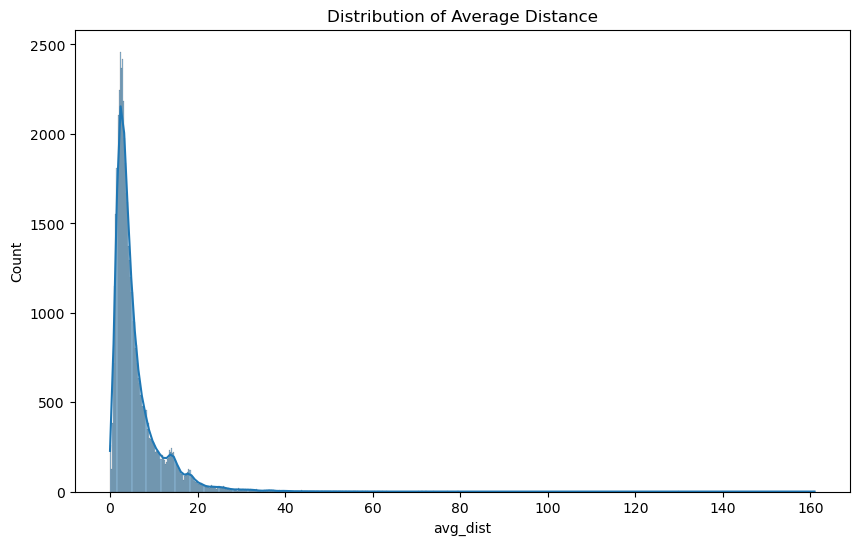

In [37]:
# Now, I'll visualize the distributions of the key features in the dataset
# Use a hitsogram to show the distribution of 'avg_dist'

plt.figure(figsize=(10, 6))
sns.histplot(ultimate_data_challenge_csv['avg_dist'], kde=True)
plt.title('Distribution of Average Distance')
plt.show()

In [38]:
ultimate_data_challenge_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
 12  days_since_last_trip    50000 non-null  int64 

In [39]:
# Build and display a correlation matrix/heatmap
# One hot encode the categorical columns

categorical_columns = ['city', 'phone']
ultimate_data_challenge_encoded = pd.get_dummies(ultimate_data_challenge_csv, columns=categorical_columns, drop_first=True)

In [40]:
ultimate_data_challenge_encoded.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_trip,active_in_sixth_month,city_King's Landing,city_Winterfell,phone_iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,14,1,True,False,True
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,57,0,False,False,False
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,175,0,False,False,True
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,2,1,True,False,True
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,108,0,False,True,False


In [41]:
ultimate_data_challenge_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trips_in_first_30_days  50000 non-null  int64         
 1   signup_date             50000 non-null  datetime64[ns]
 2   avg_rating_of_driver    50000 non-null  float64       
 3   avg_surge               50000 non-null  float64       
 4   last_trip_date          50000 non-null  datetime64[ns]
 5   surge_pct               50000 non-null  float64       
 6   ultimate_black_user     50000 non-null  bool          
 7   weekday_pct             50000 non-null  float64       
 8   avg_dist                50000 non-null  float64       
 9   avg_rating_by_driver    50000 non-null  float64       
 10  days_since_last_trip    50000 non-null  int64         
 11  active_in_sixth_month   50000 non-null  int32         
 12  city_King's Landing     50000 non-null  bool  

In [42]:
# Select only numeric columns

numeric_data = ultimate_data_challenge_encoded.select_dtypes(include=['number'])

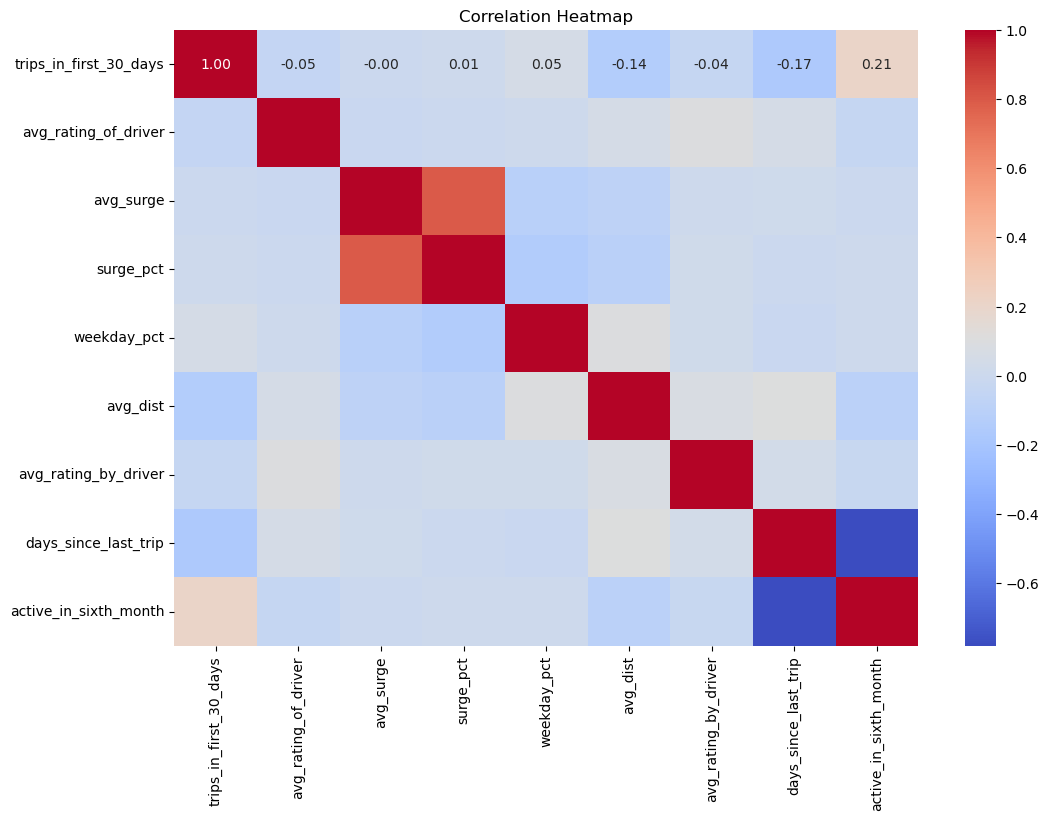

In [43]:
# Now, Plot the heatmap

correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**Calculate the Retention Fraction**

In [45]:
# Calculate retention fraction

retention_fraction = ultimate_data_challenge_encoded['active_in_sixth_month'].mean()
print(f"Retention Fraction: {retention_fraction:.2f}")

Retention Fraction: 0.38


Based on the retention calculation that I performed above, it seems that 38% of the users were retained. Now, I'll proceed by splitting the data and building a predictive model that can help Ultimate determine the actiity likelihood of users in their 6th month.

**Split the Data for Modeling**

In [47]:
from sklearn.model_selection import train_test_split

# Select the features and target variable

features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 
            'surge_pct', 'weekday_pct', 'trips_in_first_30_days', 'ultimate_black_user']
X = ultimate_data_challenge_encoded[features]
y = ultimate_data_challenge_encoded['active_in_sixth_month']

# Convert categorical variables to dummies

X = pd.get_dummies(X, drop_first=True)

# Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train a Predictive Model**

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# Train the model

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate performance

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

Accuracy: 0.67
Precision: 0.64
Recall: 0.30
AUC-ROC: 0.67


I chose to start by building a Logistic Regression model due to the fact that it serves a good baseline model. Since we're attempting to predict retention (a classification task), this model is useful because it's straightforward and efficient. The coefficients that Logistic Regression provides directly display the relationship between each feature and the likelihood of user/rider retention. Applying cross validation helps prevent overfitting. My next step in modeling would be to train a Random Forest and a Gradient Boosting model. Random Forest would be helpful if the relationships between each feature is complex, and Gradient Boosting is ideal for maximizing predictive performance (it also handles missing values well which we do a lot of). 

**Examine Feature Importance**

In [51]:
# Examine the importance of the features

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)

                  Feature  Coefficient
6     ultimate_black_user     0.846847
5  trips_in_first_30_days     0.123360
3               surge_pct     0.003113
4             weekday_pct     0.000348
0                avg_dist    -0.029557
1    avg_rating_by_driver    -0.070683
2    avg_rating_of_driver    -0.087759


**Use K-Fold Cross Validation**

In [53]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation

cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print(f"Cross-Validated AUC-ROC Scores: {cv_scores}")
print(f"Mean AUC-ROC: {np.mean(cv_scores):.2f}")

Cross-Validated AUC-ROC Scores: [0.6642834  0.6721933  0.66431585 0.6664853  0.6742667 ]
Mean AUC-ROC: 0.67


Here are some brief insights/overviews of how each feature's coefficient relates to retention:

-**ultimate_black_user, Coefficient: 0.846847(positive)** Riders that are ultimate black users are much more likely to be retained. This implies that users that pay for premium services find more value in the overall service and continuing engaging as a result.

-**trips_in_first_30_days, Coefficient: 0.123360(positive)** Riders that takemore trips in the first 30 days of having signed up are more likely to be retained. This could mean that usage early on helps build that habit of using the service.

-**surge_pct, Coefficient: 0.003113(positive, but minor impact)** This coefficient suggest that a higher percentage of trips being taken during surge pricing has minor, but positive effect on rider retention. Riders that take trips during this time elect to do so out of necessity, but it does not strongly suggest that this alone will retain them.

-**weekday_pct, Coefficient: 0.000348 (positive, but very minor impact)** This coefficient suggests that riders who take more weekday trips are more likely to stick around or be retained.

-**avg_dist, Coefficient: -0.029557 (negative)** Riders that take longer trips are less likely to be retained. Perhaps the higher cost that's associated with longer trips is discouraging to a rider.

-**avg_rating_by_driver, Coefficient: -0.070683 (negative)** Riders that are rated poorly by their drivers are less likely to be retained or stick around. Unpleasant experiences between drivers and riders could discourage a rider from returning. 

-**avg_rating_of_driver, Coefficient: -0.087759 (negative)** Riders who rate their drivers poorly are less likely to be retained. Similar to the previous feature, unpleasant experiences between drivers and riders could discourage a rider from returning.

Based on the analysis above, Ulimate should consider focusing on:
1. Encouraging a Rider's Early Engagement (trips_in_first_30_days)
2. Promote Premium Services (ultimate_black_user)
3. Improve the Experience of Riders (avg_rating_of_driver)
Ultimate could use these three focuses to build targeted retention strategies that could anticiapte rider churn in order to maximize rider retention.

From a technical aspect, it's worth noting that Ulimate should consider evaluating more complex models since our baseline model's evaluation metrics (accuracy, presicion, recall, AUC-ROC) could be stronger. This initial breakdown serves as a valuable starting point for how Ultimate can proceed in order to maximize rider retention. 